# Overview

This week's curriculum focuses in figuring out (and visualizing) what's special about a certain text (or collection of texts). We'll also learn about community detection in networks (that's how we'll get our groups of text)

* Tricks for raw text (NLPP, Chapter 3).
* Community Detection and info-boxes 
* Identifying important words in a document (TF-IDF)

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the latter parts we will go back to network science, discussing community detection, mixing in some NLP, and trying it all out on our very own dataset.


# Part 1: Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

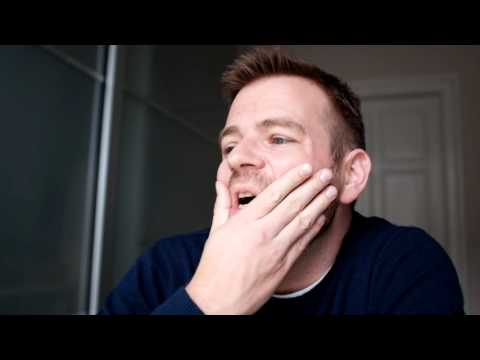

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

# Part 2: Community detection

Before we get started on *network* communities, we'll grab some information on a different kind of communities based on information from Wikipedia. Specifically, the ``infoboxes``. An infobox is the little box usually displayed on the right when you open an artist's page. 

For example if you open the page for [Old 97's](https://en.wikipedia.org/wiki/Old_97%27s), you'll see that it contains info about their ***origin***, the ***genre***s of music they've been associated with, their ***year's active***, the record ***labels*** they've signed with, etc. All really interesting information if we want to understand the network of artists.

Today, we'll be playing with **genre**. It's not easy to extract information from the infoboxes, but one of your amazing TAs (Aliaksandr) has done the job for you already (he even parsed the html to get data for more artists).

> **You can download the genres [here](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt)**.



Now, let's watch a lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

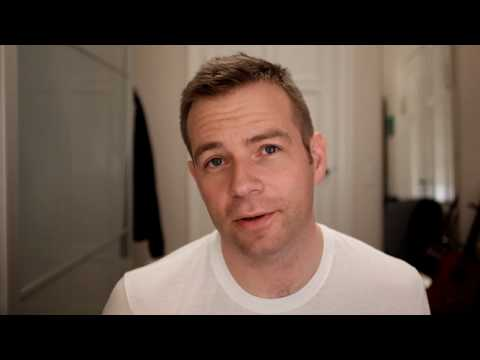

In [2]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

*Exercise*: Use the concept of modularity to explore how _community-like_ the genres are.
> 
> * Explain the concept of modularity in your own words.
> * Work from the undirected version of the network, keeping only the nodes for which you have genre information in the file above. 
> * Now create your own partition of the network into genres.
>      * **Each node is simply characterized by the *first genre* in its list of genres**
>      * Each community is the group of nodes that share the same genre.
>      * That's all you need, now calculate the modularity of this division of the network into genres.
>      * **Note**: Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above. Are the genres good communities?

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code here. But do write your own explanation of modularity, and do try to implement a modularity on your own from eq 9.12 in the book.
</div>

* Explain the concept of modularity in your own words.

**Answer:**
Modularity is a measure of clustered a network is and how easy it is to turn the graph into modules of nodes.

In [3]:
import networkx as nx
import json

# Load the existing Country Musician network
G = nx.read_graphml(r"C:\Users\jbhan\Desktop\SocialGraphsAssignment2\Exercises_Johan\data\new_country_musician_graph.graphml")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# When we convert the graph to an undirected graph, we lose the information about the direction of the edges.
# Furthermore, we lose about 30% of the edges, since the graph is directed and we have both directions for each edge.
G = G.to_undirected()
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 2095
Number of edges: 18217
Number of nodes: 2095
Number of edges: 15366


In [4]:
import networkx as nx
import json

# Load the JSON file containing genre information
with open('../data/artists_genres_dictionary.json') as f:
    genre_artists_original = json.load(f)

# Normalize function to handle name matching
def normalize_name(name):
    return name.replace("_", " ")

# Apply normalization to artist_genres
normalized_artist_genres = {normalize_name(artist): genres for artist, genres in genre_artists_original.items()}

# print(normalized_artist_genres)

# Add genre attribute, using normalized names for matching
for artist in G.nodes():
    normalized_artist = normalize_name(artist)
    if normalized_artist in normalized_artist_genres and normalized_artist_genres[normalized_artist]:
        G.nodes[artist]['genre'] = normalized_artist_genres[normalized_artist][0]
    else:
        G.nodes[artist]['genre'] = 'Unknown'

# Verify by printing a sample of nodes with their genre attribute
for node, data in list(G.nodes(data=True))[:10]:
    print(node.replace("_"," "), f"{data}")


print("\nNumber of nodes in the network:", G.number_of_nodes())
print("Number of edges in the network:", G.number_of_edges())

Red Sovine {'length_of_content': 2604, 'genre': 'country'}
George Jones {'length_of_content': 8384, 'genre': 'country'}
Goldie Hill {'length_of_content': 1124, 'genre': 'country'}
Hank Williams {'length_of_content': 10601, 'genre': 'country'}
Ray Peterson {'length_of_content': 1318, 'genre': 'traditional pop'}
Webb Pierce {'length_of_content': 3391, 'genre': 'country'}
Minnie Pearl {'length_of_content': 2566, 'genre': 'Unknown'}
Charley Pride {'length_of_content': 5149, 'genre': 'country'}
Cowboy Copas {'length_of_content': 1251, 'genre': 'country'}
Patsy Cline {'length_of_content': 13315, 'genre': 'country'}

Number of nodes in the network: 2095
Number of edges in the network: 15366


In [5]:
# Get the set of artist names from the graph
graph_artists = set(G.nodes())

# Get the set of artist names from the genre dictionary
genre_artists = set(genre_artists_original.keys())

graph_artists = {normalize_name(artist) for artist in graph_artists}

# print(genre_artists)

# Find artists in the graph but not in the genre dictionary
missing_artists = graph_artists - genre_artists

# convert to _ for missing artists
missing_artists = {artist.replace(" ", "_") for artist in missing_artists}

print(f"Number of artists in the graph: {len(graph_artists)}")
print(f"Number of artists in the genre dictionary: {len(genre_artists)}")
print(f"Number of artists in the graph but not in the genre dictionary: {len(missing_artists)}")
print(missing_artists)

Number of artists in the graph: 2095
Number of artists in the genre dictionary: 1833
Number of artists in the graph but not in the genre dictionary: 262
{'Mary_Lou_Turner', 'The_Honeycutters', 'Greg_Bates', 'Luke_Bell_(musician)', 'The_Southern_Gothic', 'Kathy_Durkin', 'Kylie_Morgan', 'Levi_Hummon', 'Jerry_Clower', 'Darryl_&_Don_Ellis', 'Joan_Kennedy_(musician)', 'The_Band_of_Heathens', 'The_Spurs', 'Ray_Kernaghan', 'Mary_Duff', 'Beverley_Mitchell', 'Randy_Howard_(fiddler)', 'Robert_Ellis_(guitarist)', 'Elisabeth_Andreassen', 'Mundo_Earwood', 'The_Black_Lillies', 'Mary_MacGregor', 'Arty_Hill', 'Roy_D._Mercer', 'Mats_Radberg', 'Bobby_Lewis_(country_singer)', 'Jeff_Bridges', 'Mason_Dixon_(band)', 'Luke_Stricklin', 'J._C._Jones', 'Leon_Everette', 'Joni_Harms', "Bill_'Cowboy_Rambler'_Boyd", 'The_JaneDear_Girls', 'LeAnn_Rimes', 'Debby_Ryan', 'Jessica_Robinson_(country_singer)', 'The_Povertyneck_Hillbillies', 'Slim_Willet', 'Karen_Lee_Batten', 'JJ_White', "Gene_O'Quin", 'Tom_House_(musician)

In [6]:
# remove all nodes in G if they are not in the genre dictionary
G.remove_nodes_from(missing_artists)
print(G.number_of_nodes())
print(G.number_of_edges())


# Save the updated graph
nx.write_graphml(G, r"C:\Users\jbhan\Desktop\socialgraphs2024\data\country_musician_graph_genres.graphml")

1833
14395


In [7]:
import networkx as nx
import json

# Step 1: Load Your Graph
G = nx.read_graphml( r"C:\Users\jbhan\Desktop\socialgraphs2024\data\country_musician_graph_genres.graphml")

# G = G.to_undirected()

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

# Step 2: Load the Artist-Genre Data
with open(r"C:\Users\jbhan\Desktop\socialgraphs2024\data\artists_genres_dictionary.json", "r", encoding="utf-8") as f:
    artist_genres_data = json.load(f)

# Prepare a mapping of artist to their first genre
artist_genres = {}
for artist, genres in artist_genres_data.items():
    if genres:
        artist_name = artist.replace(' ', '_')
        artist_genres[artist_name] = genres[0]

# Step 3: Assign Communities Based on Genres
community_dict = {}
for node in G.nodes():
    if node in artist_genres:
        community_dict[node] = artist_genres[node]
    else:
        # Optionally remove nodes without genre information
        community_dict[node] = None
        # print(f"Node {node} has no genre information")

# Remove nodes without genre information
nodes_to_remove = [node for node, genre in community_dict.items() if genre is None]
print(len(nodes_to_remove))
G.remove_nodes_from(nodes_to_remove)

# Update the community dictionary
community_dict = {node: genre for node, genre in community_dict.items() if genre is not None}

# Update degrees after removing nodes
degrees = dict(G.degree())

# Total number of edges
m = G.number_of_edges()
print(f"Total number of edges in the network: {m}")

# Step 4: Calculate Modularity Using Edge Iteration
M = 0.0

for u, v in G.edges():
    k_u = degrees[u]
    k_v = degrees[v]
    delta = 1 if community_dict[u] == community_dict[v] else 0
    M += (1 - (k_u * k_v) / (2 * m)) * delta

M /= (2 * m)

print(f"The modularity M of the network partitioned by genres is: {M:.4f}")

# Step 5: Interpret the Modularity Value
if M > 0.3:
    print("Genres represent strong communities.")
elif M > 0:
    print("Genres represent weak communities.")
else:
    print("Genres do not represent good communities.")


Number of nodes in the graph: 1833
Number of edges in the graph: 14395
0
Total number of edges in the network: 14395
The modularity M of the network partitioned by genres is: 0.2412
Genres represent weak communities.


*Exercise*: Community detection finding structral communities in the network
> * Again, work only with the subnetwork of nodes that have a genre according to Aliaksandr's list (that you downloaded above). 
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities each network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the genres as communities? What does this comparison reveal about them?
>     * **Note**: This implementation is also available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain). 
>     * **Note**: You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * What is the modularity of this partitioning of the network? Is it more community-like than the genres?
> * Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2).
>     * This time assign each node a different color based on its structural _community_.
>     * **Note**: If there's a lot of small communities, it's OK to only color the 5-10 largest communities (you can make the remaing nodes light gray or some netural color)
>     * Describe the structure you observe.

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here. 
</div>

In [8]:
# After removing nodes without genre information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 1833
Number of edges: 14395


In [9]:
import networkx as nx
import json
import community as community_louvain
import matplotlib.pyplot as plt
from collections import Counter


# Replace spaces with underscores in artist names
artist_genres = {artist.replace(' ', '_'): genres for artist, genres in artist_genres_data.items()}

# Filter out nodes without genre information
nodes_with_genre = set(artist_genres.keys())
nodes_to_remove = [node for node in G.nodes if node not in nodes_with_genre]
G.remove_nodes_from(nodes_to_remove)

# Remove isolated nodes
isolated_nodes = list(nx.isolates(G))
print(f"Removing {len(isolated_nodes)} isolated nodes")
G.remove_nodes_from(isolated_nodes)

# Verify the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Check connectivity
is_connected = nx.is_connected(G)
num_components = nx.number_connected_components(G)
print(f"Is the graph connected? {is_connected}")
print(f"Number of connected components: {num_components}")
# Adjust the resolution parameter
resolution = 2  # Adjust this value as needed
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))
modularity = community_louvain.modularity(partition, G)
print(f"Using resolution {resolution}, found {num_communities} communities with modularity {modularity}")

Removing 3 isolated nodes
Number of nodes: 1830
Number of edges: 14395
Is the graph connected? True
Number of connected components: 1
Using resolution 2, found 8 communities with modularity 0.38550765318464153


In [10]:
from collections import defaultdict, Counter

# Create a dictionary to store genre counts per community
community_genres = defaultdict(lambda: defaultdict(int))
overall_genre_counts = Counter()  # To track genre counts across all communities
community_sizes = Counter()  # To track the size of each community

# Loop over all nodes to count genres within each community
for node, community in partition.items():
    genres = artist_genres.get(node, [])
    community_sizes[community] += 1  # Track the size of the community
    for genre in genres:
        community_genres[community][genre] += 1
        overall_genre_counts[genre] += 1  # Track genre counts across all communities

# Sort communities by size in descending order
sorted_communities = community_sizes.most_common()

# Print out the top 5 genres for each community, sorted by size
for community, size in sorted_communities:
    print(f"Community {community} (Size: {size} artists):")
    
    # Sort genres by count in descending order for this community
    genre_counts = community_genres[community]
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Print only the top 5 genres (or fewer if less than 5)
    top_genres = sorted_genres[:5]
    
    for genre, count in top_genres:
        print(f"  {genre}: {count} artists")

    # If more genres are present, indicate that there are additional genres
    if len(sorted_genres) > 5:
        print(f"  ...and {len(sorted_genres) - 5} more genres")
    
    print("\n\n")

print(f"\nCommunities sorted by size:")
for comm, size in sorted_communities:
    print(f"Community {comm}: {size} artists")

# Step to print the overall top 10 genres across all communities
print("\nTop 15 Genres Across All Communities:")
sorted_overall_genres = overall_genre_counts.most_common(15)

for genre, count in sorted_overall_genres:
    print(f"{genre}: {count} artists")


Community 3 (Size: 430 artists):
  country: 360 artists
  country pop: 74 artists
  pop: 52 artists
  country rock: 47 artists
  rock: 22 artists
  ...and 93 more genres



Community 0 (Size: 407 artists):
  country: 353 artists
  rockabilly: 65 artists
  gospel: 59 artists
  pop: 47 artists
  rock and roll: 38 artists
  ...and 105 more genres



Community 2 (Size: 368 artists):
  country: 309 artists
  bluegrass: 87 artists
  folk: 38 artists
  country rock: 20 artists
  americana: 20 artists
  ...and 97 more genres



Community 1 (Size: 317 artists):
  country: 199 artists
  americana: 99 artists
  folk: 96 artists
  country rock: 61 artists
  rock: 51 artists
  ...and 131 more genres



Community 5 (Size: 240 artists):
  country: 214 artists
  southern rock: 19 artists
  country rock: 18 artists
  pop: 8 artists
  country rap: 7 artists
  ...and 59 more genres



Community 7 (Size: 36 artists):
  country: 32 artists
  country rock: 2 artists
  neotraditional country: 2 artists
  out

100%|██████████| 2000/2000 [01:33<00:00, 21.31it/s]


BarnesHut Approximation  took  12.90  seconds
Repulsion forces  took  77.99  seconds
Gravitational forces  took  0.33  seconds
Attraction forces  took  0.38  seconds
AdjustSpeedAndApplyForces step  took  1.23  seconds


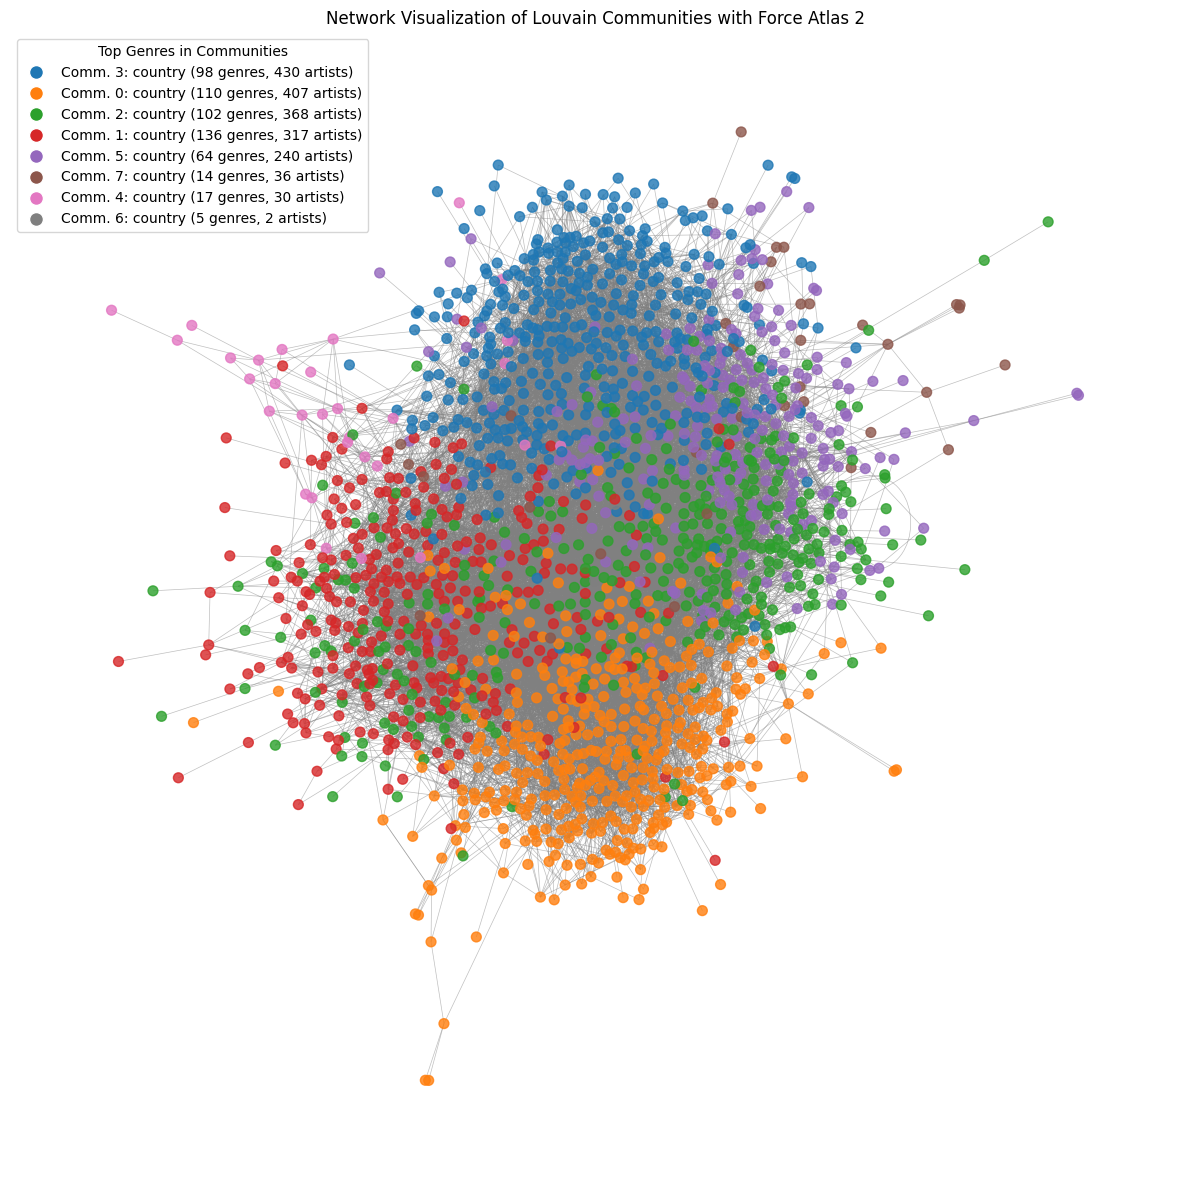

In [11]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import networkx as nx
from fa2_modified import ForceAtlas2


# Get the list of communities from the partition
community_ids = set(partition.values())

# Count the size of each community
community_sizes = Counter(partition.values())

# Sort the communities by size in descending order
sorted_communities = [community for community, size in community_sizes.most_common()]

# Create a dictionary to store genre counts per community
community_genres = defaultdict(lambda: defaultdict(int))

# Loop over all nodes to count genres within each community
for node, community in partition.items():
    genres = artist_genres.get(node, [])
    for genre in genres:
        community_genres[community][genre] += 1

# Create a dictionary to store the top genre and number of genres for each community
community_labels = {}

for community, genre_counts in community_genres.items():
    # Find the most frequent genre in the community
    top_genre = max(genre_counts, key=genre_counts.get)
    # Count the number of unique genres in the community
    num_genres = len(genre_counts)
    num_artists = community_sizes[community]

    if num_genres > 1:
        # Create a label in the format: "Top Genre (X genres)"
        community_labels[community] = f"Comm. {community}: {top_genre} ({num_genres} genres, {num_artists} artists)"
    else:
        community_labels[community] = f"Comm. {community}: {top_genre} ({num_genres} genre, {num_artists} artists)"

# Assign colors to communities based on sorted order (by size)
# Let's color only the top 10 largest communities
num_top_communities = 10
top_communities = sorted_communities[:num_top_communities]

# Use a color map that supports many colors
colors = plt.get_cmap('tab10')  # Supports up to 10 distinct colors
color_map = {community_id: colors(i) for i, community_id in enumerate(top_communities)}

# Assign a neutral color for the smaller communities
neutral_color = 'lightgray'

# Color nodes based on community
node_colors = []
for node in G.nodes():
    community_id = partition[node]
    if community_id in top_communities:
        node_colors.append(color_map[community_id])
    else:
        node_colors.append(neutral_color)  # Neutral color for smaller communities

# Compute the layout using Force Atlas 2
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT lin-lin mode
    adjustSizes=False,  # Prevent overlap (NOT)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

# Draw the network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, positions, node_size=50, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, positions, edge_color='gray', alpha=0.5, width=0.5)
plt.axis("off")

# Add a legend with the top genres and number of genres per community
legend_labels = [community_labels[community_id] for community_id in top_communities]
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                      markerfacecolor=color_map[top_communities[i]], markersize=10) for i in range(len(top_communities))]

plt.legend(handles=handles, loc="best", title="Top Genres in Communities")
plt.title("Network Visualization of Louvain Communities with Force Atlas 2")
plt.tight_layout()
plt.show()


Ok, now in this final community exercise, we want to check if the genres align with the communities.


> *Exercise*: Communities versus genres.
> * Compare the communities found by your algorithm with the music genres by creating a matrix $D$ with dimension ($G \times C$), where G is the 7 most common genres and C is the 7 most common communities. We set entry $D(i,j)$ to be the number of nodes that genre $i$ has in common with community $j$. The matrix $D$ is what we call a confusion matrix.
> * Use the confusion matrix to explain how well the communities you've detected correspond to the genres.
>     * **Note**: This time, use all the genres associate with each node
>     * **Note**: If a node is not characterized by any of the 7 most popular genres, just ignore it.
>     * **Note**: If a node is not part of by any of the 7 largest communiteis, just ignore it.

<div class="alert alert-block alert-info">
Again, you may use an LLM to help with the code for this assignment. The main thing is you get the D matrix right and interpret it.
</div>

In [12]:
import numpy as np
from collections import Counter, defaultdict

# Step 1: Find the 7 most common genres
all_genres = []
for genres in artist_genres.values():
    all_genres.extend(genres)  # Combine all genres from all artists

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Get the 7 most common genres
most_common_genres = [genre for genre, count in genre_counts.most_common(7)]

# Step 2: Find the 7 most common communities
community_counts = Counter(partition.values())

# Get the 7 largest communities
most_common_communities = [community_id for community_id, count in community_counts.most_common(7)]

# Step 3: Create the confusion matrix D (7x7)
D = np.zeros((7, 7), dtype=int)  # Initialize a 7x7 matrix

# Step 4: Fill the confusion matrix
# Loop over all nodes and check if they belong to the top genres and top communities
for node, community in partition.items():
    genres = artist_genres.get(node, [])
    
    # Only consider nodes in one of the top 7 communities
    if community in most_common_communities:
        community_idx = most_common_communities.index(community)
        
        # Check each genre of the node
        for genre in genres:
            # Only consider genres in the top 7 most common genres
            if genre in most_common_genres:
                genre_idx = most_common_genres.index(genre)
                D[genre_idx, community_idx] += 1  # Increment the corresponding matrix entry

# Step 5: Print the confusion matrix D
print("Confusion Matrix (Genres vs Communities):")
print(D)

# Optionally: You can print the genres and communities for reference
print("\nTop 7 communities (confusion matrix):", most_common_communities)

# Compare with the lourvain sorted communities
print("\nTop 7 communities (louvain partitioning):",sorted_communities[:7])



Confusion Matrix (Genres vs Communities):
[[360 353 309 199 214  32  28]
 [ 11  31  38  96   1   0   1]
 [ 47  18  20  61  18   2   4]
 [ 52  47  12  34   8   0   2]
 [ 16  14  20  99   5   1   1]
 [  7   7  87  24   3   0   0]
 [ 22  14  17  51   7   1   3]]

Top 7 communities (confusion matrix): [3, 0, 2, 1, 5, 7, 4]

Top 7 communities (louvain partitioning): [3, 0, 2, 1, 5, 7, 4]


# Part 3: Words that characterize pages or groups of pages

Now, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

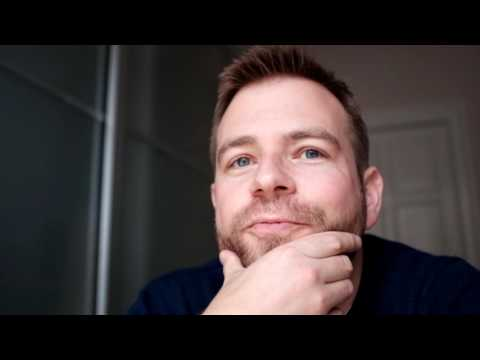

In [13]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

_Exercise_: Comparing in the different genres. 

*Setup*. You'll need to go to your archives and find the wikipedia pages of all the country artists. 

Once you have the texts ready, you will want to aggregate the text into 15 long lists, one for each of the top 15 genres (let's call them 15 *documents*). Each document contains on all the text in that genre (so for the country genre it's a looooong big doc). In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. So the format should be

```
word0 count0
word1 count1
word2 count2

...

wordN countN
```
This list is called a ***Term Frequency*** (or TF) list for each community. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into individual strings
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words
> * It's OK to filter out rare words (e.g. words that only appear less than 5 times).

If you are confused by the instructions for cleaning, go back and have a  look Chapter 3 again. 

> *Action item*: 
> * Create your TF list for each of the 15 most popular genres.
> * List the top 15 words for each genre.
> * Comment on the top 15 words for each genre.

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here, but write your own comments.
</div>

In [14]:
top_15_genres = [genre for genre, count in sorted_overall_genres]

# Step 1: Reverse the mapping to get genre -> list of artists
genres_by_artist = defaultdict(list)

for artist, genres in artist_genres.items():
    for genre in genres:
        genres_by_artist[genre].append(artist)

# Step 2: Filter the dictionary to keep only the top 15 genres
filtered_genres_by_artist = {genre: artists for genre, artists in genres_by_artist.items() if genre in top_15_genres}

# Step 3: Print the result (only for the top 15 genres)
for genre, artists in filtered_genres_by_artist.items():
    print(f"Genre: {genre} ({len(artists)} artists)")
    for artist in artists:
        print(f"  {artist}")

# Print the total number of genres processed
print(f"\nTotal genres processed: {len(filtered_genres_by_artist)}")

Genre: country (1499 artists)
  A_Thousand_Horses
  A.P._Carter
  Aaron_Barker
  Aaron_Benward
  Aaron_Lines
  Aaron_Neville
  Aaron_Pritchett
  Aaron_Watson
  Adam_Brand_(musician)
  Adam_Harvey
  Adrienne_Young
  Al_Anderson_(NRBQ)
  Al_Caiola
  Al_Dexter
  Al_Downing_(musician)
  Al_Hurricane_Jr.
  Al_Hurricane
  Alabama_(band)
  Alecia_Elliott
  Alee_(singer)
  Aleyce_Simmonds
  Alisan_Porter
  Alison_Krauss
  Alli_Walker
  Allison_Moorer
  Alyssa_Micaela
  Amanda_Stott
  Amanda_Wilkinson
  Amber_Dotson
  Amber_Hayes
  American_Young
  Amie_Comeaux
  Amy_Dalley
  Amy_Helm
  Andrew_Combs_(musician)
  Andrew_Jenkins_(songwriter)
  Andy_Childs
  Andy_Gibson_(singer)
  Andy_Griggs
  Angaleena_Presley
  Anita_Carter
  Anita_Cochran
  Anne_Murray
  Anthony_Armstrong_Jones
  Anthony_Smith_(singer)
  Archer/Park
  Arlene_Harden
  Ash_Bowers
  Ashley_Arrison
  Ashley_Campbell_(musician)
  Ashley_Cooke
  Ashley_Gearing
  Ashley_McBryde
  Ashton_Shepherd
  Asleep_at_the_Wheel
  Aubrey_Haynie


In [ ]:
import aiohttp
import asyncio
from bs4 import BeautifulSoup
from collections import Counter
import nltk
import string
from tqdm.notebook import tqdm
import os
import json
import networkx as nx  # Assuming G is already defined

# Download stopwords from nltk (if you haven't already)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stopwords and punctuation removal
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation)

# Semaphore to limit concurrent requests
semaphore = asyncio.Semaphore(40)

# Function to clean and tokenize text
def clean_and_tokenize(text):
    tokens = text.lower().split()
    tokens = [word.translate(punctuation_table) for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Async function to fetch Wikipedia page content with alternative parsing
async def fetch_wikipedia_text(session, artist_name, retries=3):
    url = f"https://en.wikipedia.org/wiki/{artist_name.replace(' ', '_')}"
    async with semaphore:
        for attempt in range(retries):
            try:
                timeout = aiohttp.ClientTimeout(total=10)
                async with session.get(url, timeout=timeout) as response:
                    if response.status == 200:
                        html_content = await response.text()
                        soup = BeautifulSoup(html_content, "html.parser")
                        
                        # Try to extract from <p> tags first
                        paragraphs = soup.find_all('p')
                        text = ' '.join([para.get_text() for para in paragraphs])
                        
                        # Fallback to extract from other tags if <p> is empty
                        if not text.strip():
                            other_tags = soup.find_all(['li', 'span', 'div'])
                            text = ' '.join([tag.get_text() for tag in other_tags])
                        
                        return text if text.strip() else ""
                    elif response.status == 404:
                        print(f"Page not found for {artist_name}")
                        return ""
            except Exception as e:
                print(f"Attempt {attempt + 1} failed for {artist_name}: {e}")
            await asyncio.sleep(1)  # Pause before retry
    return ""

# Process each artist’s text, clean, tokenize, and save it to the node
async def process_artist(session, artist):
    text = await fetch_wikipedia_text(session, artist)
    if text:
        tokens = clean_and_tokenize(text)
        cleaned_text = ' '.join(tokens)
        word_count = Counter(tokens)
        G.nodes[artist]['content'] = cleaned_text
        G.nodes[artist]['word_count'] = dict(word_count)
        return artist, word_count, cleaned_text
    else:
        print(f"Content not found for {artist}")
        return artist, None, None

# Process each genre by fetching and processing text for all associated artists
async def process_genre(session, genre, artists):
    tasks = [process_artist(session, artist) for artist in artists]
    artist_results = await asyncio.gather(*tasks, return_exceptions=True)
    artist_results = [
        result for result in artist_results
        if isinstance(result, tuple) and result[1] is not None
    ]
    return genre, artist_results

# Main function to scrape data for all genres with error handling
async def scrape_genres(genres_by_artist):
    async with aiohttp.ClientSession() as session:
        tasks = [process_genre(session, genre, artists) for genre, artists in genres_by_artist.items()]
        results = []
        for future in tqdm(asyncio.as_completed(tasks), total=len(tasks), desc="Processing genres"):
            try:
                result = await future
                results.append(result)
            except Exception as e:
                print(f"Error processing a genre: {e}")
    return results

# Run the scraping in Jupyter
async def run_scraping_in_jupyter():
    scrape_results = await scrape_genres(filtered_genres_by_artist)
    word_counts_per_genre = []
    cleaned_texts_per_genre = []

    for genre, artist_results in scrape_results:
        word_counts_genre = Counter()
        cleaned_texts = []

        for artist, word_count, cleaned_text in artist_results:
            if word_count:  # Ensure word_count exists
                word_counts_genre.update(word_count)
                cleaned_texts.append(cleaned_text)

        word_counts_per_genre.append((genre, dict(word_counts_genre)))
        filename = f'../data/{genre}_cleaned_text.txt'
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(" ".join(cleaned_texts))

    with open('../data/genre_word_counts.json', 'w', encoding='utf-8') as f:
        json.dump(word_counts_per_genre, f)

    # Report artists that couldn't be processed
    nodes_without_content = [node for node, data in G.nodes(data=True) if 'content' not in data]
    print(f"\nNumber of nodes without content: {len(nodes_without_content)}")
    print(f"\nArtists without content:")
    print(nodes_without_content)

# In Jupyter, you would run this cell:
await run_scraping_in_jupyter()


# Async function to process nodes without content with added debugging
async def process_nodes_without_content():
    async with aiohttp.ClientSession() as session:
        # Create a list of tasks
        tasks = [process_artist(session, artist) for artist in nodes_without_content]
        if not tasks:
            print("No tasks were created; nodes_without_content might be empty.")
            return []

        # Use asyncio.gather to execute all tasks and capture results
        results = await asyncio.gather(*tasks, return_exceptions=True)

        # Debugging: check if results are actually populated
        for artist, result in zip(nodes_without_content, results):
            if result is None or isinstance(result, Exception):
                print(f"No content for {artist} or an error occurred: {result}")
            else:
                print(f"Content fetched for {artist}")

    return results

# Run the async function in Jupyter or an async environment
results = await process_nodes_without_content()

nodes_without_content = [node for node, data in G.nodes(data=True) if 'content' not in data]
print(f"Final nodes without content: {len(nodes_without_content)}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jbhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing genres:   0%|          | 0/15 [00:00<?, ?it/s]


Number of nodes without content: 93

Artists without content:
['Ashley_Monroe', 'Rodney_Crowell', 'Brooks_&_Dunn', 'Sam_Bush', 'Larry_the_Cable_Guy', 'Bill_Engvall', 'Jeff_Foxworthy', 'Michael_Martin_Murphey', 'Steve_Martin', 'Bob_Wills', 'Scott_Vestal', 'Punch_Brothers', 'Spade_Cooley', 'George_Strait', 'Hootie_&_the_Blowfish', 'Redneck_Souljers', 'The_Lacs', 'Moonshine_Bandits', 'Billy_Joe_Shaver', 'Speedy_West', 'Chelle_Rose', 'Floyd_Tillman', 'John_Hartford', 'Adam_Gregory', 'Uncle_Dave_Macon', 'Bon_Jovi', 'Stoney_LaRue', 'Perry_Como', 'Smiley_Burnette', 'Casey_Donahew', 'Roger_Knox', 'The_Derailers', 'Shaboozey', 'Roy_Drusky', 'Jerry_Jeff_Walker', 'Carson_Robison', 'Hank_Williams_III', 'Laura_Cantrell', "Ramblin'_Jack_Elliott", 'Jason_Boland_&_the_Stragglers', 'The_Country_Gentlemen', 'Sparx_(US_band)', 'Lorenzo_Antonio', 'Chris_Tomlin', 'Avicii', 'Teea_Goans', 'Lenny_Cooper', 'Sir_Rosevelt', 'Bill_Carlisle', 'Dianna_Corcoran', 'Amber_Lawrence', 'Midland_(band)', 'Those_Poor_Bast

In [ ]:
import aiohttp
import asyncio
from tqdm.notebook import tqdm



Initial nodes without content: 93
Content fetched for Ashley_Monroe
Content fetched for Rodney_Crowell
Content fetched for Brooks_&_Dunn
Content fetched for Sam_Bush
Content fetched for Larry_the_Cable_Guy
Content fetched for Bill_Engvall
Content fetched for Jeff_Foxworthy
Content fetched for Michael_Martin_Murphey
Content fetched for Steve_Martin
Content fetched for Bob_Wills
Content fetched for Scott_Vestal
Content fetched for Punch_Brothers
Content fetched for Spade_Cooley
Content fetched for George_Strait
Content fetched for Hootie_&_the_Blowfish
Content fetched for Redneck_Souljers
Content fetched for The_Lacs
Content fetched for Moonshine_Bandits
Content fetched for Billy_Joe_Shaver
Content fetched for Speedy_West
Content fetched for Chelle_Rose
Content fetched for Floyd_Tillman
Content fetched for John_Hartford
Content fetched for Adam_Gregory
Content fetched for Uncle_Dave_Macon
Content fetched for Bon_Jovi
Content fetched for Stoney_LaRue
Content fetched for Perry_Como
Content

In [22]:
# save the updated graph as networkx json_graph
from networkx.readwrite import json_graph

data = json_graph.node_link_data(G)
with open(r"C:\Users\jbhan\Desktop\socialgraphs2024\data\country_musician_graph_genres_content.json", "w") as f:
    json.dump(data, f)


# Part 4: Visualization

**Step 1: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work you can refer here https://anaconda.org/conda-forge/wordcloud. 
Also, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. If my experience generalizes, your life will be easier if you use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step 2: Draw some wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its score (rounded up to the nearest integer value). 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each genre. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)

<div class="alert alert-block alert-info">
As above, it's OK to use an LLM to help get the code going. But write your own answers to the questions / write your own comments.
</div>

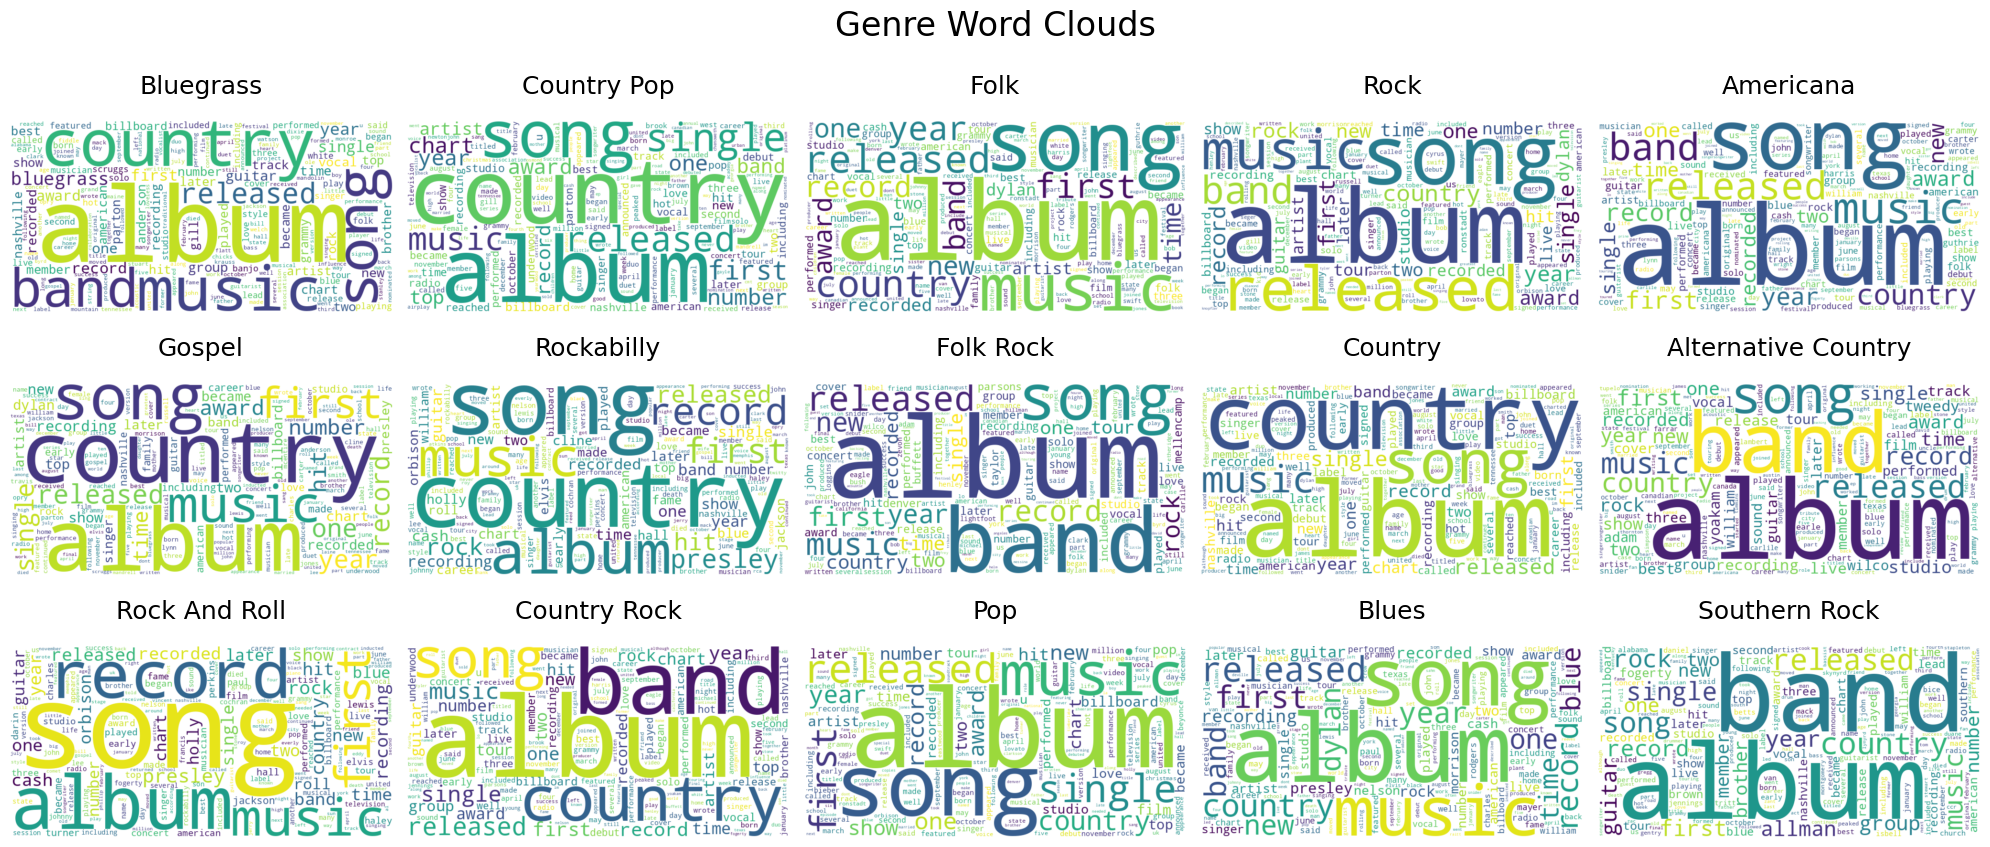

In [17]:
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

# Load the word counts from the JSON file
with open('../data/genre_word_counts.json', 'r') as f:
    word_counts_per_genre_serializable = json.load(f)

# Convert the data back into the original format: list of tuples with Counters
word_counts_per_genre = [
    (genre, Counter(word_count)) for genre, word_count in word_counts_per_genre_serializable
]

# Prepare the text data for the word cloud
texts_for_wordcloud = {}

for genre, word_count in word_counts_per_genre:
    # Create a list of words repeated according to their counts
    words = []
    for word, count in word_count.items():
        words.extend([word] * int(round(count)))  # Repeat the word according to its count
    
    # Join the words into a single string
    text = ' '.join(words)
    texts_for_wordcloud[genre] = text

# Generate and display word clouds for each genre
num_genres = len(texts_for_wordcloud)
num_cols = 5  # Number of columns in the grid
num_rows = 3  # Number of rows in the grid

# Adjust num_rows in case the number of genres is less than the grid size
num_rows = min(num_rows, math.ceil(num_genres / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 3))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for idx, (genre, text) in enumerate(texts_for_wordcloud.items()):
    ax = axes[idx]
    # Create a WordCloud object with desired settings
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          collocations=False).generate(text)
    
    # Display the generated image
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    # Set the title with increased font size and padding
    ax.set_title(f"{genre.title()}", fontsize=18, pad=20)

# Hide any empty subplots if the number of genres is less than num_rows * num_cols
for idx in range(len(texts_for_wordcloud), len(axes)):
    axes[idx].axis('off')

# Adjust layout spacing
plt.tight_layout()
plt.subplots_adjust(top=0.90)  # Adjust the top margin to make room for the overall title

# Optionally, add an overall title for the entire figure
plt.suptitle('Genre Word Clouds', fontsize=24)

plt.show()


# Part 5: Understanding TF-IDF

Now we jump back into the NLP work. In this last part, we'll be creating word-clouds again. But this time, we'll be using the method from the paper I discuss above: TF-IDF. Historically people have had a hard time grasping the idea behind TF-IDF, so here's a little exercise designed to make you study it a bit more carefully.

*Exercise 4*: Wrap your brain around TF-IDF

First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is that the term frequency doesn't capture just what's special about a text. It also captures words that are just frequent in all text. 

This is clear from the top counts in one of my lists:

```
of 
in 
and 
the 
to 
a 
is
by
was
as
ref
with
first
 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's special about a particular text.*** 

To focus on just what's special, TF-IDF has two components: The *term frequency* (TF) and a *weight* (IDF). The weight draws on a larger corpus of text emphasize what's special about the text we're interested in.

Further, there are some extra things going on. For example, there are multiple definitions of TF. Above, we just looked at the raw counts.

> *Action items*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.
>   * What does IDF stand for? Answer in your own words.
>   * How does IDF draw on a larger corpus to extract what's special a certain text? Answer in your own words.

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is?
>   * Explain why using IDF makes stopword removal less important.

<div class="alert alert-block alert-info">
The point of this exercise is to understand TF-IDF. So I encourage you to ask questions to an LLM to really understand the concept. Perhaps ask it to explain TF-IDF at the level of a high-school student. Once you've done that, then answer the questions in the action items on your own.
</div>

**Term Frequency-Inverse Document Frequency (TF-IDF)** is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It helps highlight words that are more significant to a particular document within the corpus.

The TF-IDF score for a term $ t $ in a document $ d $ is calculated as:

$$
\text{TF-IDF}_{t,d} = \text{TF}_{t,d} \times \text{IDF}_t
$$

### **Components:**

1. **Term Frequency (TF):**

   Measures how frequently a term $ t $ appears in a document $ d $.

   - **Raw Count Definition:**

     $$
     \text{TF}_{t,d} = f_{t,d}
     $$

     - $ f_{t,d} $: The raw count of term $ t $ in document $ d $.

   - **Log-Normalized Term Frequency:**

     To reduce the impact of very frequent terms.

     $$
     \text{TF}_{t,d} = 1 + \log(f_{t,d})
     $$

2. **Inverse Document Frequency (IDF):**

   Measures how important a term is across the corpus.

   $$
   \text{IDF}_t = \log\left( \frac{N}{n_t} \right)
   $$

   - $ N $: Total number of documents in the corpus.
   - $ n_t $: Number of documents containing the term $ t $.



### **Explanation of Each Term:**

- $ \text{TF-IDF}_{t,d} $: The TF-IDF score for term $ t $ in document $ d $. A higher score indicates greater importance.

- $ \text{TF}_{t,d} $: Term Frequency of term $ t $ in document $ d $, reflecting how common the term is in that document.

- $ f_{t,d} $: Raw frequency count of term $ t $ in document $ d $.

- $ \text{IDF}_t $: Inverse Document Frequency of term $ t $, quantifying the rarity of the term across all documents.

- $ N $: Total number of documents, providing context for term rarity.

- $ n_t $: Document frequency of term $ t $, i.e., the number of documents where the term appears at least once.



### **Key Points:**

- **TF (Term Frequency):** Reflects the importance of a term within a specific document.

- **IDF (Inverse Document Frequency):** Reduces the weight of terms that occur frequently across the corpus and increases the weight of terms that are rare.

- **Logarithms in IDF:** Using the logarithm scales down the effect of very rare terms, preventing extremely high weights and ensuring balanced weighting.



### **Usage:**

- **Information Retrieval:** TF-IDF is widely used in search engines to rank documents based on query relevance.

- **Text Mining:** It helps identify significant words in large text corpora.

- **Feature Extraction:** In machine learning, TF-IDF scores are used as features for algorithms dealing with textual data.



**By combining TF and IDF, TF-IDF effectively highlights words that are important to a document but not common across the entire corpus, making it a powerful tool for text analysis.**


# Part 6: Genres and TF-IDF word-clouds

**But wait a minute!** Now we have all of the ingredients for a wonderful cocktail 😎

* We have genres - descriptions of related nodes in the network. 
* And you're an expert on TF-IDF, so you can extract words that characterize a text relative to everything that's going on.
* Finally, you can create nice WordCouds!

So let's put it all together. Let's use TF-IDF and wordcoulds to build a deeper understanding of the top communities.

Thus, the aim of this final part is to create genre wordclouds for the top 15 genres based on TF-IDF. 

For each genre, create a single document for each community consisting of all the cleaned text from all members of the community. So in the end, you should have 15 documents in total.

_Exercise_: Genre Word-clouds

> * Now that we have the community-texts, let's start by grabbing the TF lists from the exercise above (you may modify to use whichever version of TF you like). 
> * Next, calculate IDF for every word in every list (use whichever version of IDF you like). 
>   * Which base logarithm did you use? Is that important?
> * We're now ready to calculate TF-IDFs. Do that for each genre. 
>   * List the 10 top words for each genre accourding to TF-IDF. Are these 10 words more descriptive of the genre than just the TF? Justify your answer.
> * Create a wordcloud for each genre. 
> * Explain your creation. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code. But do write your own answers to the questions.
</div>

*Exercise*: Community Word-clouds (optional)
> * Redo the exercise above but for the structural communities.
> * Do the word clouds seem more meaningful than for the genres? Add nuance to your answer by considering the confusion matrix $D$ that you calculated above.

<div class="alert alert-block alert-info">
Since this is optional, you can do wat you want with LLMs. Maybe you can get one to solve the whole exercise?
</div>

In [18]:
genres_texts = {}
for genre in top_15_genres:
    filename = f'../data/cleaned_texts/{genre}_cleaned_text.txt'
    with open(filename, 'r', encoding='utf-8') as f:
        genres_texts[genre] = f.read()

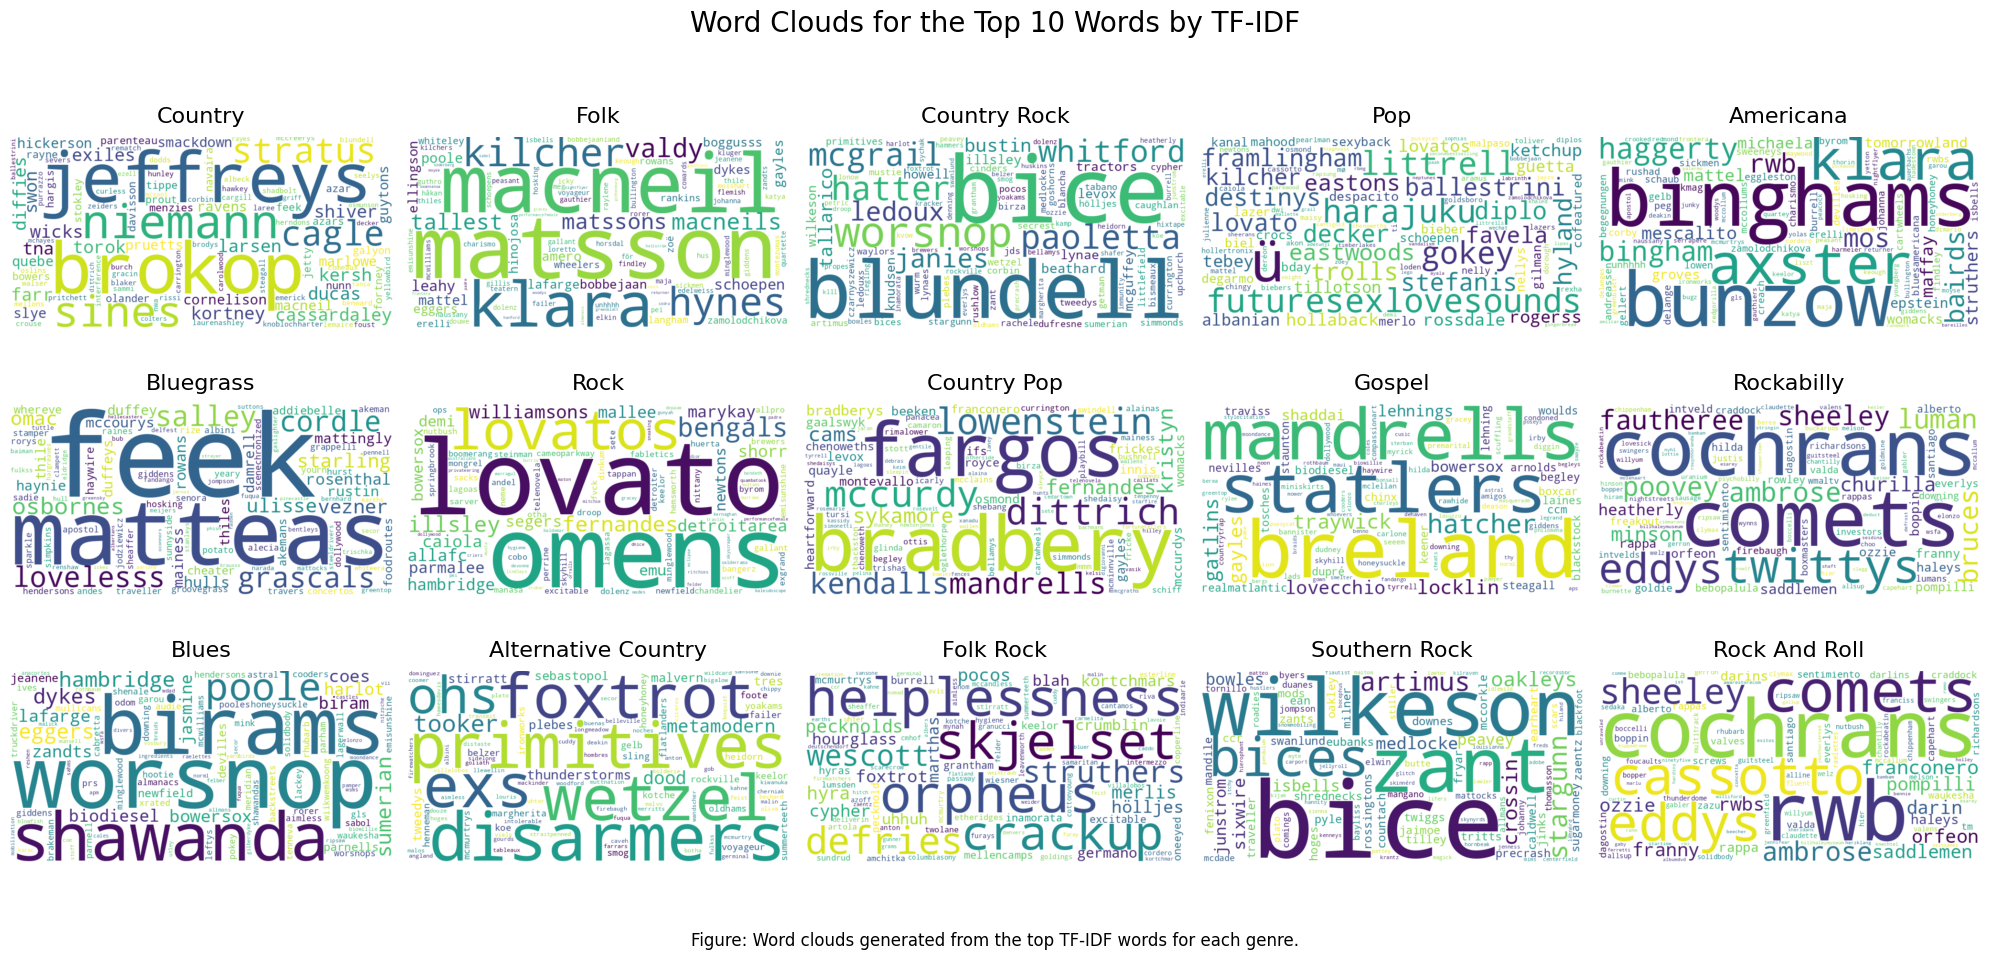

In [19]:
import json
from collections import Counter
import math
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Calculate TF for each genre
tf_by_genre = {}
for genre, text in genres_texts.items():
    word_counts = Counter(text.split())
    tf_by_genre[genre] = {word: 1 + math.log(count) for word, count in word_counts.items()}

# Calculate IDF across all genres
total_documents = len(genres_texts)
df_counts = Counter()
for text in genres_texts.values():
    unique_words = set(text.split())
    for word in unique_words:
        df_counts[word] += 1

idf = {word: math.log(total_documents / df_count) for word, df_count in df_counts.items()}

# Calculate TF-IDF for each genre
tfidf_by_genre = {}
for genre, tf_values in tf_by_genre.items():
    tfidf_by_genre[genre] = {word: tf * idf[word] for word, tf in tf_values.items()}

# Get top 10 TF-IDF words for each genre
top_words_by_genre = {}
for genre, tfidf in tfidf_by_genre.items():
    sorted_tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)
    top_words = sorted_tfidf[:10]
    top_words_by_genre[genre] = top_words

# Prepare data for the table
table_data = []
for genre, words in top_words_by_genre.items():
    words = [f"{word} ({score:.2f})" for word, score in words]
    table_data.append(words)
# Create a DataFrame with 5 columns and 3 rows
df = pd.DataFrame(table_data, index=[genre.title() for genre in top_words_by_genre],
                  columns=[f"Word #{i+1}" for i in range(10)])

# Create and display word clouds
num_genres = len(genres_texts)
num_cols = 5
num_rows = math.ceil(num_genres / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 3))
axes = axes.flatten()

for idx, (genre, tfidf_scores) in enumerate(tfidf_by_genre.items()):
    ax = axes[idx]
    # Get the top TF-IDF scores for the word cloud
    top_tfidf_scores = dict(sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:100])
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False)
    wordcloud.generate_from_frequencies(top_tfidf_scores)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(genre.title(), fontsize=16, pad=10)

# Hide any empty subplots
for idx in range(len(tfidf_by_genre), len(axes)):
    axes[idx].axis('off')

# Add a main title
fig.suptitle('Word Clouds for the Top 10 Words by TF-IDF', fontsize=20, y=1.02)

# Add an in-figure caption
caption_text = 'Figure: Word clouds generated from the top TF-IDF words for each genre.'
plt.figtext(0.5, -0.02, caption_text, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()

# print(df)

In [20]:
df.head()

Word #1                     Word #2          Word #3  \
Country        brokop (12.96)            jeffreys (12.49)  niemann (11.83)   
Folk          matsson (11.92)             macneil (10.36)     klara (8.24)   
Country Rock     bice (10.74)             blundell (9.68)   worsnop (8.87)   
Pop                 ü (10.38)  futuresexlovesounds (9.85)  littrell (9.44)   
Americana     binghams (9.65)               bunzow (8.94)    axster (8.34)   

                      Word #4          Word #5             Word #6  \
Country         sines (11.83)    cagle (11.63)     stratus (11.53)   
Folk           kilcher (8.14)     hynes (8.05)        valdy (7.72)   
Country Rock  paoletta (8.66)    hatter (8.66)      mcgrail (7.98)   
Pop           harajuku (9.44)     gokey (9.00)  framlingham (8.94)   
Americana        klara (8.24)  haggerty (8.05)      bingham (8.03)   

                          Word #7             Word #8          Word #9  \
Country       cassardaley (11.42)       kersh (11.42)    ducas (11.31)   
Folk              macneils (7.60)      tallest (7.56)  matssons (7.56)   
Country Rock      whitford (7.98)       janies (7.98)    ledoux (7.87)   
Pop                 trolls (8.94)  ballestrini (8.93)    decker (8.80)   
Americana              rwb (7.33)          mos (7.07)    bairds (7.07)   

                      Word #10  
Country         exiles (11.31)  
Folk           schoepen (7.55)  
Country Rock     bustin (7.56)  
Pop            destinys (8.66)  
Americana     mescalito (7.07)